In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
#https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [ ]:
wine = load_wine()

In [ ]:
wine.data.shape

(178, 13)

In [ ]:
wine.data[:, 0:2].shape

(178, 2)

In [ ]:
X = wine.data[:, 0:2]
y = wine.target

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 13)

In [ ]:
X_train.shape

(160, 2)

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
pipe = Pipeline([
        ('std', StandardScaler()),
        ('pca', PCA(n_components = 2)),
    ], verbose = True)
pipe.fit(X_train)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.0s


Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=2))],
         verbose=True)

In [ ]:
X_train_pca = pipe.transform(X_train)
X_test_pca = pipe.transform(X_test)

In [ ]:
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0


In [ ]:
import warnings
#from sklearn.exceptions import UserWarning
warnings.simplefilter('always', category=UserWarning)

In [ ]:
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
list( itertools.product([0, 1], repeat=2) )

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [ ]:
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']
clfs = [ SVC(kernel=kernel_f) for kernel_f in kernel_functions ]

In [ ]:
X.shape, X_train.shape, y.shape, y_train.shape

((178, 2), (160, 2), (178,), (160,))

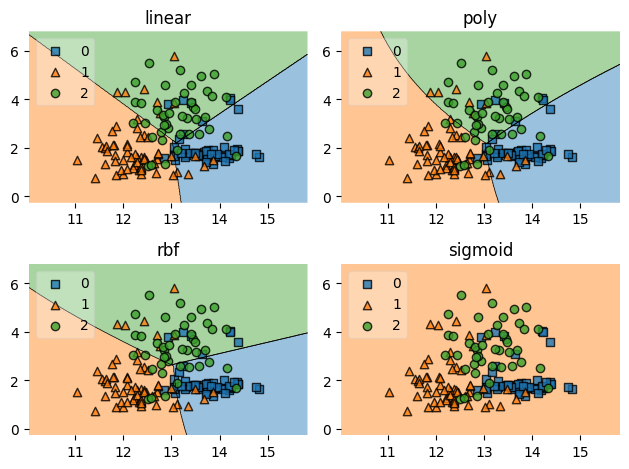

In [ ]:
gs = gridspec.GridSpec(2, 2)
for clf, lab, grd in zip(clfs,
                         kernel_functions,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

In [ ]:
#https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

In [ ]:
import seaborn as sb

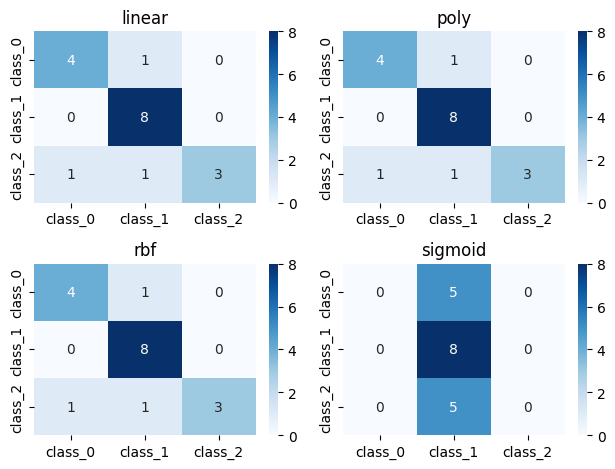

In [ ]:
gs = gridspec.GridSpec(2, 2)
for clf, kernel_f, grd in zip(clfs,
                         kernel_functions,
                         itertools.product([0, 1], repeat=2)):

    y_pred = clf.predict(X_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    cm = confusion_matrix(y_test, y_pred)
    sb.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax);
    ax.xaxis.set_ticklabels(wine.target_names);
    ax.yaxis.set_ticklabels(wine.target_names);
    plt.title(kernel_f)

plt.tight_layout()
plt.show()

Les couleurs foncées dans le cas sigmoïde sont inutiles avec les 0 partout ailleurs